# BANK MARKET ANALYSIS PROJECT
*AUTHOR:* 
### HANSEL JONES OMONDI

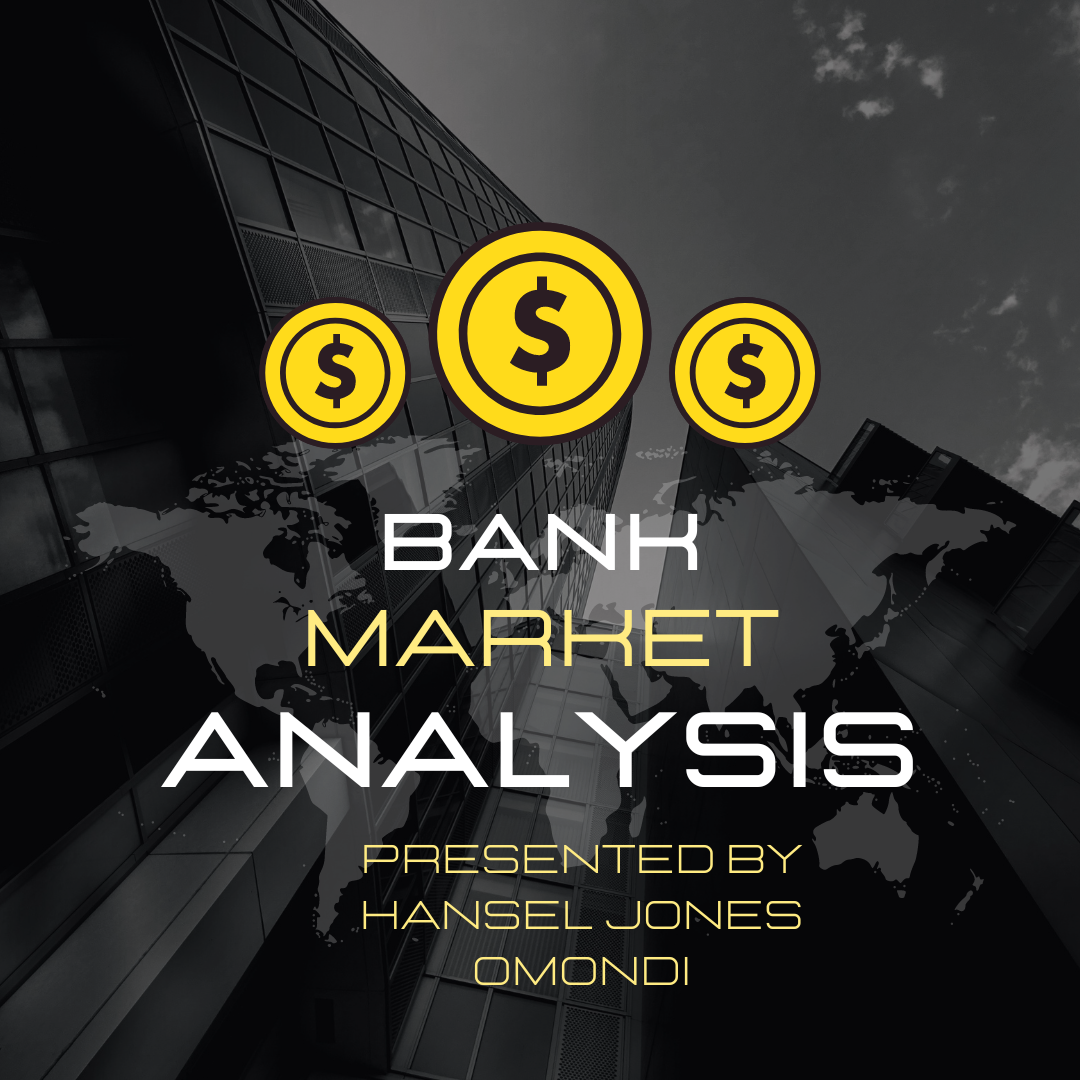

# Overview
In an effort to optimize marketing campaigns for increasing term deposit subscriptions, this project leverages data from a Portuguese bank's direct marketing efforts. The primary goal is to build predictive models that classify clients into two categories: those likely to subscribe to a term deposit and those who are not. By analyzing attributes such as age, campaign duration, and economic conditions, the bank aims to enhance marketing efficiency, reduce unnecessary contacts, and increase the overall conversion rate.

## Business Understanding
The bank is focused on improving its marketing campaigns to increase term deposit subscriptions. The challenge is identifying which clients are most likely to subscribe, enabling the bank to allocate resources more effectively and reduce costs. A predictive model will help in targeting high-potential leads, refining contact strategies, and segmenting customers for more personalized marketing efforts. This approach aims to improve conversion rates while maintaining positive client relations by minimizing excessive contacts.

## Data Understanding and Analysis
The dataset includes information from 41,188 direct marketing interactions. Key variables include client demographics (age, job type), marketing campaign data (number of contacts, duration of calls), and external economic indicators (employment variation rate, consumer confidence index).

### DATA EXPLORATION AND PREPROCESSING
Here i import the necessary tools for exploration, load the dataset check for missing values and convert categorical variables to a numerical format


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#Load the dataset and display the first few rows
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science\Phase 3\Project\bank+marketing\bank\bank-full.csv', delimiter=';')
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science\Phase 3\Project\bank+marketing\bank\bank.csv' , delimiter=';')
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Data Science\Phase 3\Project\bank+marketing\bank\bank-additional-full.csv' , delimiter=';')
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [11]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [12]:
# Check for missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


* As per the dataset documentation no missin values are expected hence the 0 outcome

In [13]:
# Convert cateorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1              

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)


print(df_encoded.columns)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [15]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


Feature and Target Separation: Split the dataset into features (X) and the target variable (y), where y is whether the client subscribed (1 for yes, 0 for no).

In [16]:
# Separate features and target variable
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is the binary target variable (1 for 'yes', 0 for 'no')
y = df_encoded['y_yes']

#### Exploratory Data Analysis (EDA)
Here we perform EDA to understand the data and its distribution, and identify relationships between variables.

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

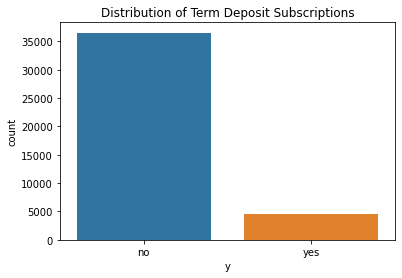

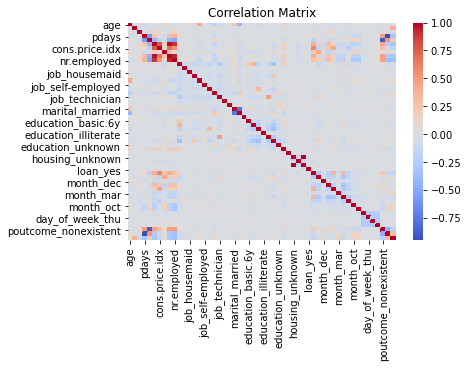

In [19]:
# Descriptive statistics
print(df.describe())

# Distribution of the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()

# Correlation matrix
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Target Variable Distribution: Visualization of  the distribution of clients who subscribed vs. those who didn’t.
* Correlation Matrix: Identifying relationships between numeric features to see potential multicollinearity or strong predictors.

### Model Development - Logistic Regression
Here we build a logistic regression model to predict the likelihood of a client subscribing to a term deposit.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Predict probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]



### Model Evaluation - Classification Metrics
Here we evaluate the logistic regression model using various classification metrics to understand its performance.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [25]:
# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9101723719349356
Precision: 0.6643109540636042
Recall: 0.4060475161987041
F1 Score: 0.5040214477211796
ROC AUC: 0.9340299603165227
Confusion Matrix:
[[10683   285]
 [  825   564]]


## Interpretation of results
#### 1. Accuracy: 0.910

Interpretation: The model correctly predicts whether a client will subscribe or not 91% of the time.

#### 2. Precision: 0.664

*Interpretation:* Out of all the clients the model predicted would subscribe, only 66.4% actually subscribed. This suggests that when the model predicts a positive outcome (subscription), it's not always reliable, with about one-third of the predicted subscribers not actually subscribing (false positives).

*Business Impact:* The bank may end up contacting a significant number of clients who are predicted to subscribe but actually don’t, leading to unnecessary marketing costs.

#### 3. Recall: 0.406

*Interpretation:* The model correctly identifies 40.6% of the actual subscribers. In other words, it misses about 59.4% of the clients who would have subscribed (false negatives).

*Business Impact:* The model misses a substantial number of clients who could have subscribed, which means lost opportunities for the bank. Low recall suggests the model is not very effective at capturing all potential subscribers.

#### 4. F1 Score: 0.504

*Interpretation:* The F1 score is the harmonic mean of precision and recall. At 50.4%, the F1 score suggests a balanced performance but with room for improvement. A low F1 score is usually due to a trade-off between precision and recall, as seen in this case.

*Business Impact:* While the model is moderately good at identifying positive cases (subscribers), it struggles with balancing false positives and false negatives. This leads to both unnecessary marketing and missed opportunities.

#### 5. ROC AUC: 0.934

*Interpretation:* The ROC AUC score of 0.934 is very high, indicating that the model has excellent discriminatory power. This means the model is effective at distinguishing between clients who will subscribe and those who won’t, even though precision and recall are not perfect.

*Business Impact:* Despite the imperfections in precision and recall, the model is good at ranking clients based on their likelihood to subscribe. This can help in prioritizing high-likelihood clients for targeted marketing.

#### 6. Confusion Matrix:
[[10683   285]
 [  825   564]]
True Negatives (TN): 10,683 clients correctly predicted not to subscribe.

False Positives (FP): 285 clients predicted to subscribe but didn’t.

False Negatives (FN): 825 clients predicted not to subscribe but actually subscribed (missed opportunities).

True Positives (TP): 564 clients correctly predicted to subscribe.

*Interpretation:*

The majority of non-subscribers are correctly identified (10,683 true negatives).
However, there’s a significant number of false negatives (825), meaning the model misses many clients who actually subscribed.
Business Impact: Missing 825 potential clients who would have subscribed is a considerable loss for the bank. The bank might also contact 285 clients who are incorrectly predicted to subscribe, leading to inefficiencies in marketing efforts.

*Summary and Recommendations:*
* Strength: The model has a high accuracy and ROC AUC, meaning it's good at overall prediction and discrimination between classes.
* Weakness: The low recall (40.6%) and moderate precision (66.4%) indicates that the model is missing a large proportion of potential subscribers while also contacting a non-negligible number of clients who won’t subscribe.


### Gradient Descent
Implementation of  gradient descent manually to understand how logistic regression optimizes its parameters.

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = 0.45712941119325445
Iteration 200: Loss = 0.36327306638921136
Iteration 300: Loss = 0.3161711467412991
Iteration 400: Loss = 0.2888669763195491
Iteration 500: Loss = 0.2713644184813815
Iteration 600: Loss = 0.25930185352520785
Iteration 700: Loss = 0.25053458427948744
Iteration 800: Loss = 0.24390389669822188
Iteration 900: Loss = 0.23873442660097338
Iteration 1000: Loss = 0.23460743789946703
Iteration 1100: Loss = 0.23124980585881003
Iteration 1200: Loss = 0.22847576950564719
Iteration 1300: Loss = 0.2261545183036757
Iteration 1400: Loss = 0.22419121938719436
Iteration 1500: Loss = 0.22251541589788398
Iteration 1600: Loss = 0.22107365836210438
Iteration 1700: Loss = 0.2198246673945288
Iteration 1800: Loss = 0.21873606512433658
Iteration 1900: Loss = 0.2177821099865901
Iteration 2000: Loss = 0.21694209150378765
Iteration 2100: Loss = 0.21619917014438042
Iteration 2200: Loss = 0.215539524069862
Iteration 2300: Loss = 0.2149517

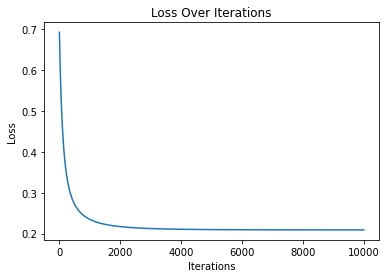

Training Accuracy: 91.09%


In [29]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Binary Cross-Entropy)
def compute_loss(y, y_hat):
    m = len(y)
    loss = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for i in range(iterations):
        # Compute linear combination
        linear_model = np.dot(X, weights) + bias
        y_hat = sigmoid(linear_model)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute loss for this iteration
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return weights, bias, losses

# Normalize the features
X_norm = (X - X.mean()) / X.std()

# Add intercept term to the feature matrix (bias term)
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# Convert target variable to binary (1 for 'yes', 0 for 'no')
y_binary = y.values

# Run Gradient Descent
weights, bias, losses = gradient_descent(X_b, y_binary, learning_rate=0.01, iterations=10000)

# Plot loss over iterations
plt.plot(range(len(losses)), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()

# Predict on the training set
def predict(X, weights, bias, threshold=0.5):
    linear_model = np.dot(X, weights) + bias
    y_hat = sigmoid(linear_model)
    return [1 if i > threshold else 0 for i in y_hat]

predictions = predict(X_b, weights, bias)

# Calculate accuracy
accuracy = np.mean(predictions == y_binary)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


### Interpretation
The results above show that the loss is decreasing over iterations.
As iterations proceed from Iteration 0 the loss decreases significantly at this early stage indicating that the model is converging and learning to minimize the error between its predictions and the actual outcomes.

The plateau on the graph indicates that the model has nearly converged and is making only small adjustments in its learning process.
The model is reaching its optimal state, and further iterations are leading to diminishing returns in loss reduction.

*Training Accuracy (91.09%)*

The training accuracy of 91.09% is a concrete  result, indicating that the model performs well on the training data. However, this accuracy should also be evaluated with test or validation data to avoid overfitting.

### Decision Trees
Building a decision tree model to classify clients and compare its performance with logistic regression.

Accuracy (Decision Tree): 0.8898599983814842
Confusion Matrix (Decision Tree):
 [[10275   693]
 [  668   721]]


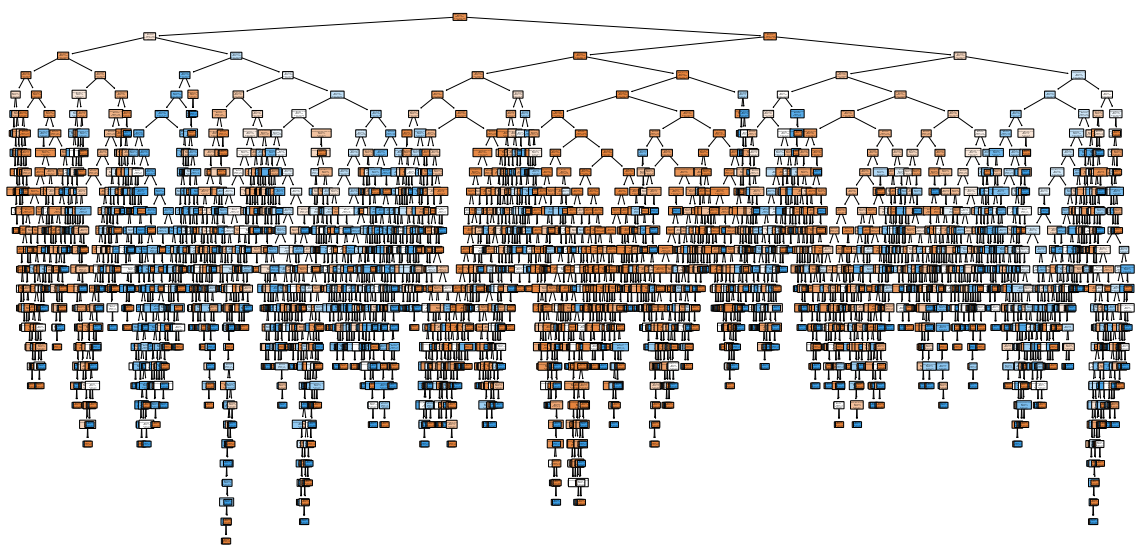

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = dtree.predict(X_test)

# Evaluate the model
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_tree))


# Plotting the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()


## Interpretation
#### 1. Accuracy (0.89):
Interpretation: The decision tree model correctly predicted the outcome (whether a client will subscribe or not) 88.99% of the time. This is a reasonably good accuracy but slightly lower compared to other models like logistic regression (if it was around 91% as in previous discussions).
#### 2. Confusion Matrix:
[[10275   693]
 [  668   721]]
True Negatives (TN): 10,275 clients who did not subscribe were correctly predicted as non-subscribers.

False Positives (FP): 693 clients were incorrectly predicted as subscribers but did not subscribe (false alarms).

False Negatives (FN): 668 clients who actually subscribed were incorrectly predicted as non-subscribers (missed opportunities).

True Positives (TP): 721 clients who subscribed were correctly predicted as subscribers.

Interpretation:

The model identifies 721 actual subscribers correctly, but it still misses 668 subscribers (false negatives), which is close to an equal number of true positives and false negatives.
The false positives (clients incorrectly predicted to subscribe) are 693, which implies some wasted marketing efforts.

## Insights and Recommendations
* Key Predictive Attributes: Age, campaign duration, and economic conditions such as employment variation rates are strong indicators of term deposit subscriptions. The bank should focus its efforts on clients within the 32-47 age group who engage in longer phone calls.

* Customer Segmentation: By clustering clients based on age, financial activity, and engagement, the bank can better allocate marketing resources to high-potential leads.

* Optimized Contact Strategy: Limiting the number of contacts to an optimal level—around 1-3 contacts per campaign—can improve conversion rates while preventing customer fatigue.

* Model Interpretability: Decision Trees provide clear insights into the decision-making process, highlighting the importance of certain attributes. The bank can use these insights to prioritize leads based on feature importance.

* Resource Allocation: By targeting clients with higher subscription probabilities, the bank can reduce costs associated with marketing campaigns while achieving higher success rates. Resources can be directed toward high-value prospects, improving both efficiency and client satisfaction.